<h1 align=center><font size = 6>DATA ANALYSIS WITH PYTHON</font></h1>

<h1 align=center><font size = 5>House Sales in King County, USA</font></h1>

## **Introduction to the dataset**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In this project we are going to address certain questions using Python.

Below is the detailed list of variables in our dataset.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Importing Libraries**


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## **Module 1: Importing Data Set**

Here, we have data in CSV format. To read it as a dataframe , we are using pd.read_csv( ) method.

Additionally, we are assigning it to a variable named "df".

In [129]:
df=pd.read_csv("kc_house_data_NaN.csv")

# We are using 'head function' to print first 5 rows of the dataframe.

df.head()  

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [130]:
# to know data types of variables in the dataset.

df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Python interprets all non-numerical data as **"Object"**. Among the numerical data, it defines them separately as either "integer" or "float" based on the decimal count.

**Not all data types are rightly mentioned in Python** 

1. Python read **'id'** as integer, while it is an **object**. id does not have any mathematical meaning. It is just used as label.

2. Python read **'water front'** as an integer, while it is an **object**. Water front do not have any mathematical meaning. It is just used as label taking 0 and 1 values.

3. Python read **'view'** as integer , while it is an **object**. View do not have any mathematical meaning even though it takes values 0,1,2,3 and 4. It is just used as label.

4. Python read **'condition'** as an integer, while it is should be **object**. Condition do not have any mathematical meaning even though it takes values 1,2,3,4 and 5. It is just used as label.

5. Python read **'zipcode'** as an integer, while it is an **object**. Zip code do not have any mathematical meaning. It is just used as label.

First, we need to make corrections in the data types for variables that were read wrong by python.

In [131]:
# To convert variables from integer to object. 

for i in ["id","waterfront","view","condition","zipcode"]:
  df[i]=df[i].astype(object)

In [132]:
# let us now check the datatypes of variables after changing. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
Unnamed: 0       21613 non-null int64
id               21613 non-null object
date             21613 non-null object
price            21613 non-null float64
bedrooms         21600 non-null float64
bathrooms        21603 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null object
view             21613 non-null object
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null object
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(10), object

Perfect! They are changed. Now we can apply "describe function" to get the statistical measures of all columns with numerical data.

In [133]:
# We use the 'describe function' to obtain a statistical summary of all numeric variables of dataframe.

df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.00000,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Module 2: Data Wrangling**

In [134]:
# to get the list of column names

df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [135]:
# We are dropping columns "id" and "Unnamed: 0" using axis =1 and inplace= True

# axis =0 is used for dropping rows.

df.drop(["id","Unnamed: 0"], axis = 1, inplace= True)

In [136]:
# to check if columns are dropped

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [70]:
# to check the total number of null values present in each column

df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see we have missing values for the columns **bedrooms** and  **bathrooms**


In [137]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())

print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 13
Number of NaN values for the column bathrooms : 10


We can replace the missing values of the column'bedrooms' with the mean of the column  'bedrooms' using the method replace().


In [138]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column  'bathrooms' using the method replace(). 


In [139]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Let us now check number of null values in those columns

In [140]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())

print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


## **Module 3: Exploratory Data Analysis**


In [141]:
# using value_counts method we can get count of the number of houses with unique floor values

floor = df["floors"].value_counts()

# using .to_frame() to convert it to a dataframe.
df1=floor.to_frame()
df1

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


We can say that majority of the houses have only one floor. 

  ### **To  determine whether houses with a waterfront view or without a waterfront view have more price outliers.**

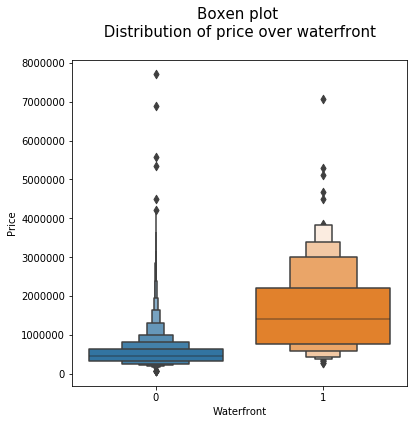

In [111]:
# we have used a boxenplot method from seaborn library

# A boxen plot is an enhanced box plot that gives more clarity regarding distribution.

plt.figure(figsize=(6,6))
plt.title("Boxen plot \n Distribution of price over waterfront \n",fontsize=15)
sns.boxenplot(data=df, x='waterfront', y = 'price')
plt.xlabel("Waterfront",fontsize=10)
plt.ylabel("Price",fontsize=10)
plt.show()

Here, 
waterfront = 1 indicates that house has a view to a waterfront.

waterfront = 0 indicates that house does not have a view to a waterfront.


It is clear from boxenplot that houses which don't have a view to a waterfront are having **more price outliers** than the houses with waterfront view.

### **To  determine if the feature sqft_above is negatively or positively correlated with price.**

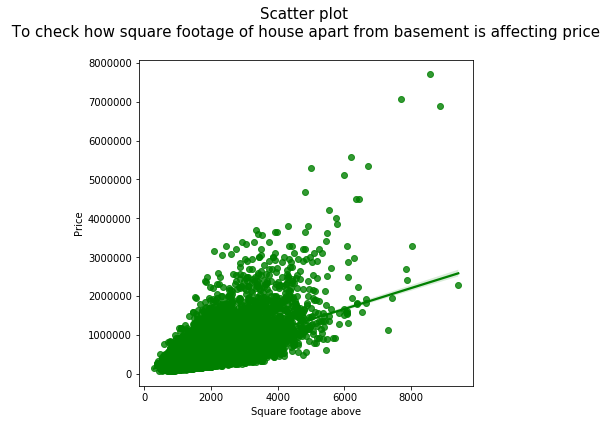

In [84]:
plt.figure(figsize=(6,6))
plt.title("Scatter plot \n To check how square footage of house apart from basement is affecting price \n",fontsize=15)
sns.regplot(data=df, x = "sqft_above", y = 'price',color="green")
plt.xlabel("Square footage above",fontsize=10)
plt.ylabel("Price",fontsize=10)
plt.show()

From the above regression plot, we can say that both variables are **positively correlated** to each other. 

As square footage of house apart from basement increases, the price of house also increases. They both move in **same direction**.

The strength of correlation is **very strong**

**Interpretation:**
A house with more square footage above has greater price.

In [112]:
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

df.corr()['price'].sort_values()

long             0.021626
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Interestingly, we can see that all the above correlation coefficients are **positive**. Thus, all the independent variables are having a positive correlation with dependent variable "Price". 

**sqft_living (living room area)** is the variable which is most correlated with price having a correlation coefficient of **0.702**.

This numerical figure is quite reasonable in practical world as well , houses that have large living area are in high demand that eventually correlate to high prices.

## **Module 4: Model Development**

### **To fit a linear regression model using the  longitude feature 'long' and  calculate the coefficient of determination (R square).**

In [116]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

rsq= round(lm.score(X, Y),6)
print("R-square value is", rsq)

R-square value is 0.000468


**This indicates that 0.05% of the variation in Price is explained by Longitude coordinate.**

It is a **poor model** as R square is close to zero.

### **To fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the coefficient of determination.**

In [115]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
rsquare_value =lm.score(X, Y)
print(round(rsquare_value,4))

0.4929


**This indicates that 49.3 % of the variation in Price is explained by living room area.**

It is a **better model** as R square is close to 0.5

### **Fitting multiple linear regression model to predict the 'price' using the list of features:**

In [49]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [118]:
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

R_square3 = round(lm.score(X, Y),4)
print("rsquare is ", R_square3)

rsquare is  0.6577


**This indicates that 65.7 % of the variation in Price is explained by all other varibles.**

It is a **good model** as R square is greater than 0.5

In [52]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Using the list **'input'** we are creating a pipeline object to predict the 'price', and fitting the object using the features in the list features, and calculating the coefficient of determination.

In [120]:
pipe = Pipeline(Input)
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
pipe.fit(X,Y)


Rsquare = round(pipe.score(X,Y),4)
print("R square is ", Rsquare)

R square is  0.7513


## **Module 5: Model Evaluation and Refinement**

Importing the necessary modules:


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [56]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


To create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the coefficient of determination using the test data.

In [57]:
from sklearn.linear_model import Ridge

In [59]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
round(RigeModel.score(x_test, y_test),4)

0.6479

To perform a **second order polynomial transform** on both the training data and testing data. 

Creating and fitting a Ridge regression object using the training data, setting the regularisation parameter to 0.1, and calculating the coefficient of determination utilising the test data provided. 

In [61]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
round(RigeModel.score(x_test_pr, y_test),4)

0.7003